# Obtendo dados financeiros

In [1]:
# Importando as bibliotecas necessárias para esta análise

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from pandas_datareader import data

%matplotlib inline



In [2]:
# Instalando o Quandl

import sys
!{sys.executable} -m pip install quandl

In [3]:
# Instalando o Pandas Datareader

!{sys.executable} -m pip install pandas_datareader

In [4]:
import quandl

In [5]:
quandl.ApiConfig.api_key = 'MpAzuBMUarJrwxRvjA1W'

# 1. Indicadores macroeconômicos com o pacote Quandl

## 1.1 Petróleo WTI

In [6]:
wti_crude = quandl.get('EIA/PET_RWTC_D')

In [7]:
type(wti_crude)

pandas.core.frame.DataFrame

In [8]:
wti_crude.head()

,Value
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


In [9]:
wti_crude.rename(columns = {'Value' : 'Petroleo'}, inplace = True)

In [10]:
wti_crude.head()

,Petroleo
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


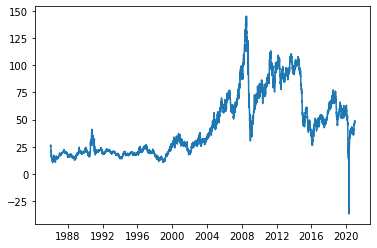

In [11]:
plt.plot(wti_crude)
plt.show()

## 1.2 PIB Dos Estados Unidos

In [12]:
PIB_US = quandl.get('FRED/GDP', start_date = '2001-01-01', end_date = '2020-01-01')

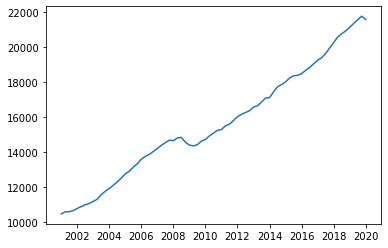

In [13]:
plt.plot(PIB_US)
plt.show()

# 1.3 IBOV

In [14]:
ibov = quandl.get('BCB/7845', start_date = '2000-01-01')

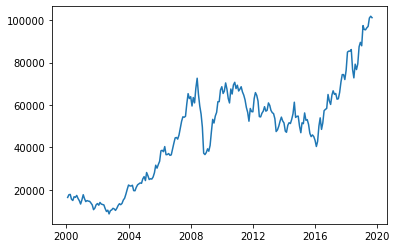

In [15]:
plt.plot(ibov)
plt.show()

In [16]:
ibov.rename(columns = {'Value': 'IBOV'}, inplace = True)

In [17]:
ibov.head()

,IBOV
Date,
2000-01-31,16388.0
2000-02-29,17660.0
2000-03-31,17820.0
2000-04-30,15537.0
2000-05-31,14956.0


# 1.4 Taxa SELIC

In [18]:
selic = quandl.get('BCB/432', start_date = '2000-01-01')

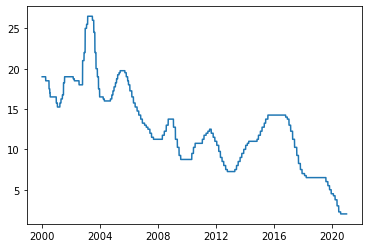

In [19]:
plt.plot(selic)
plt.show()


In [20]:
selic.rename(columns = {'Value': 'SELIC'}, inplace = True)

In [21]:
selic.head()

,SELIC
Date,
2000-01-01,19.0
2000-01-02,19.0
2000-01-03,19.0
2000-01-04,19.0
2000-01-05,19.0


# 1.5 Inflação (IPCA)

In [22]:
ipca = quandl.get('BCB/13522', start_date = '2000-01-01')

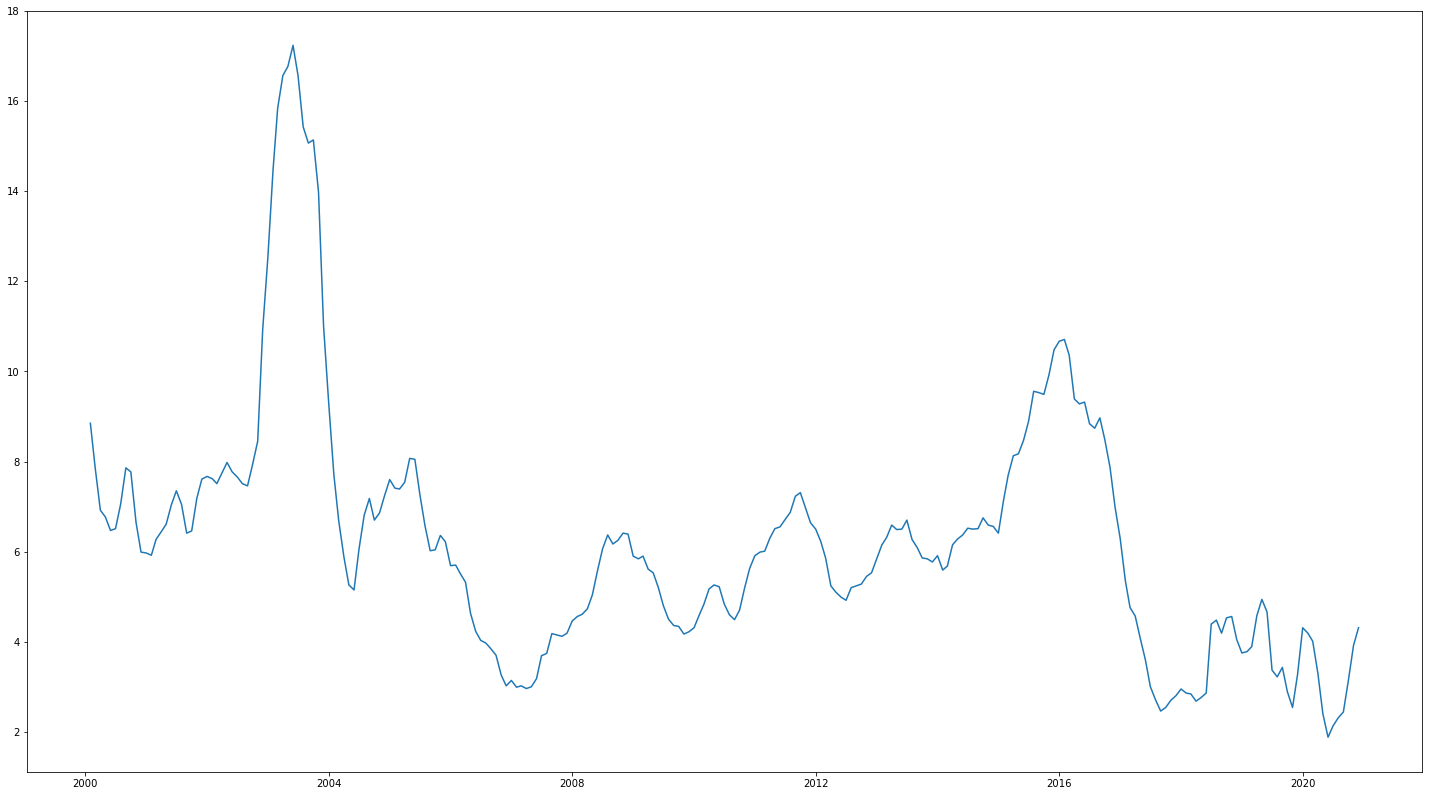

In [23]:
plt.figure(figsize = (25,14))
plt.plot(ipca);

In [24]:
ipca.rename(columns = {'Value':'IPCA'}, inplace = True)

In [25]:
ipca.head()

,IPCA
Date,
2000-01-31,8.85
2000-02-29,7.86
2000-03-31,6.92
2000-04-30,6.77
2000-05-31,6.47


# 1.6 PIB BRASILEIRO 

In [26]:
PIB_BR = quandl.get('ODA/BRA_NGDPD', start_date = '1994-01-01')

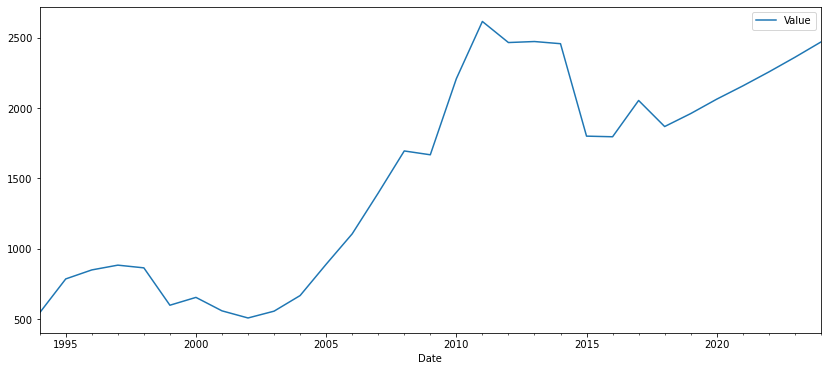

In [27]:

PIB_BR.plot(figsize=(14,6));

In [28]:
PIB_BR.rename(columns = {'Value':'PIB_BR'}, inplace = True)

In [29]:
PIB_BR.head()

,PIB_BR
Date,
1994-12-31,546.570
1995-12-31,786.536
1996-12-31,850.415
1997-12-31,884.308
1998-12-31,865.115


# 1.7 Dólar 

In [30]:
dolar = quandl.get('BCB/10813',start_date = '2000-01-01')

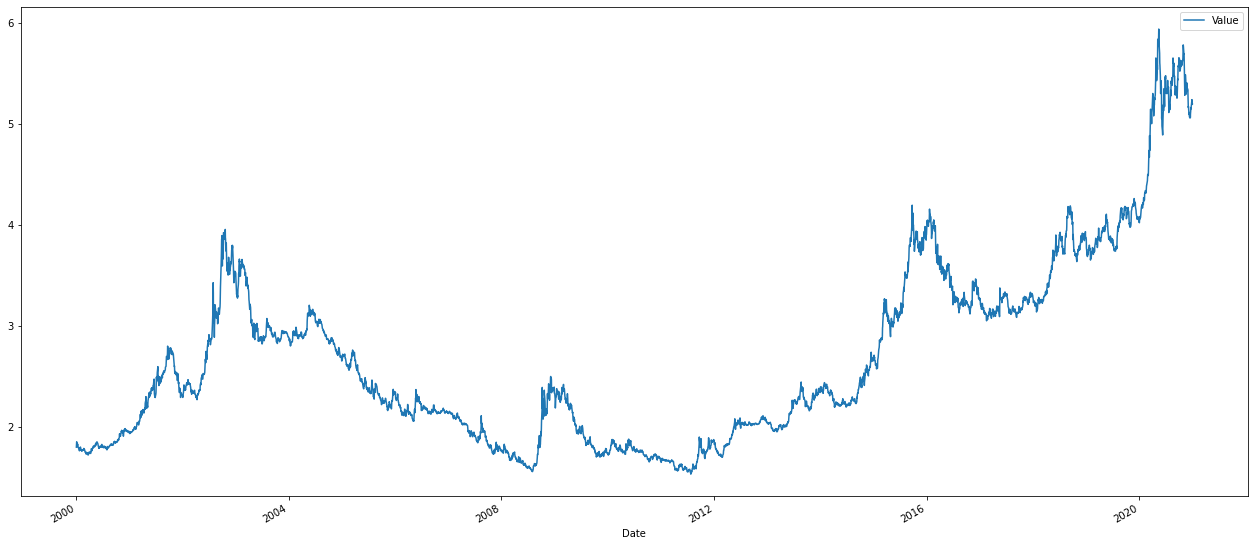

In [31]:
dolar.plot(figsize=(22,10));

In [32]:
dolar.rename(columns = {'Value': 'Dolar'}, inplace = True)

In [33]:
dolar.head()

,Dolar
Date,
2000-01-03,1.8003
2000-01-04,1.8329
2000-01-05,1.8536
2000-01-06,1.8453
2000-01-07,1.8273


# 1.8 Ouro 

In [34]:
ourobrl = quandl.get('BCB/4', start_date = '2010-01-01')

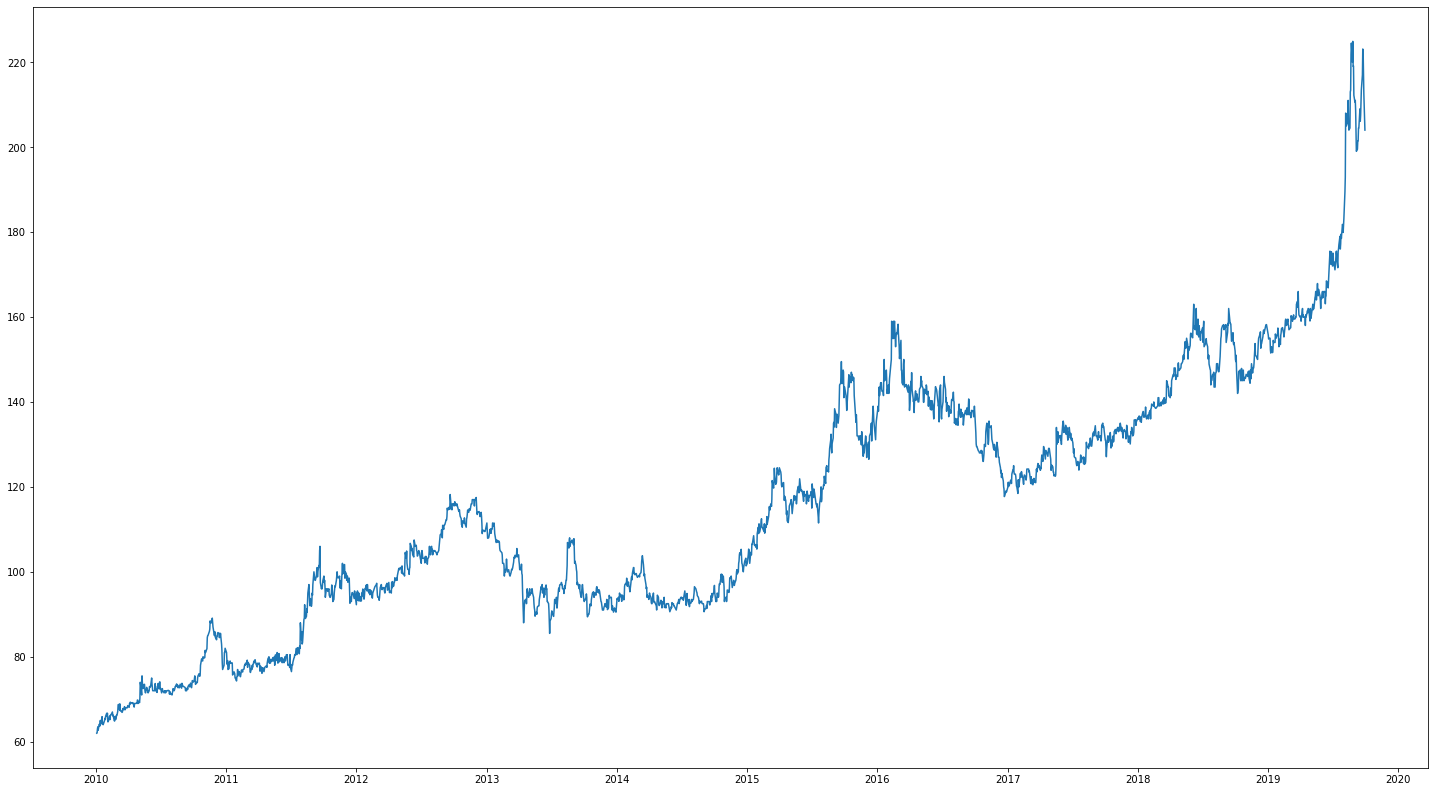

In [35]:
plt.figure(figsize = (25,14))
plt.plot(ourobrl);

In [36]:
ourobrl.rename(columns = {'Value': 'Ouro'}, inplace = True)

In [37]:
ourobrl.head()

,Ouro
Date,
2010-01-04,62.00
2010-01-05,62.05
2010-01-06,63.00
2010-01-07,63.50
2010-01-08,62.70


# 1.9 CDI

In [38]:
cdi = quandl.get('BCB/4392', start_date = '2000-01-01')

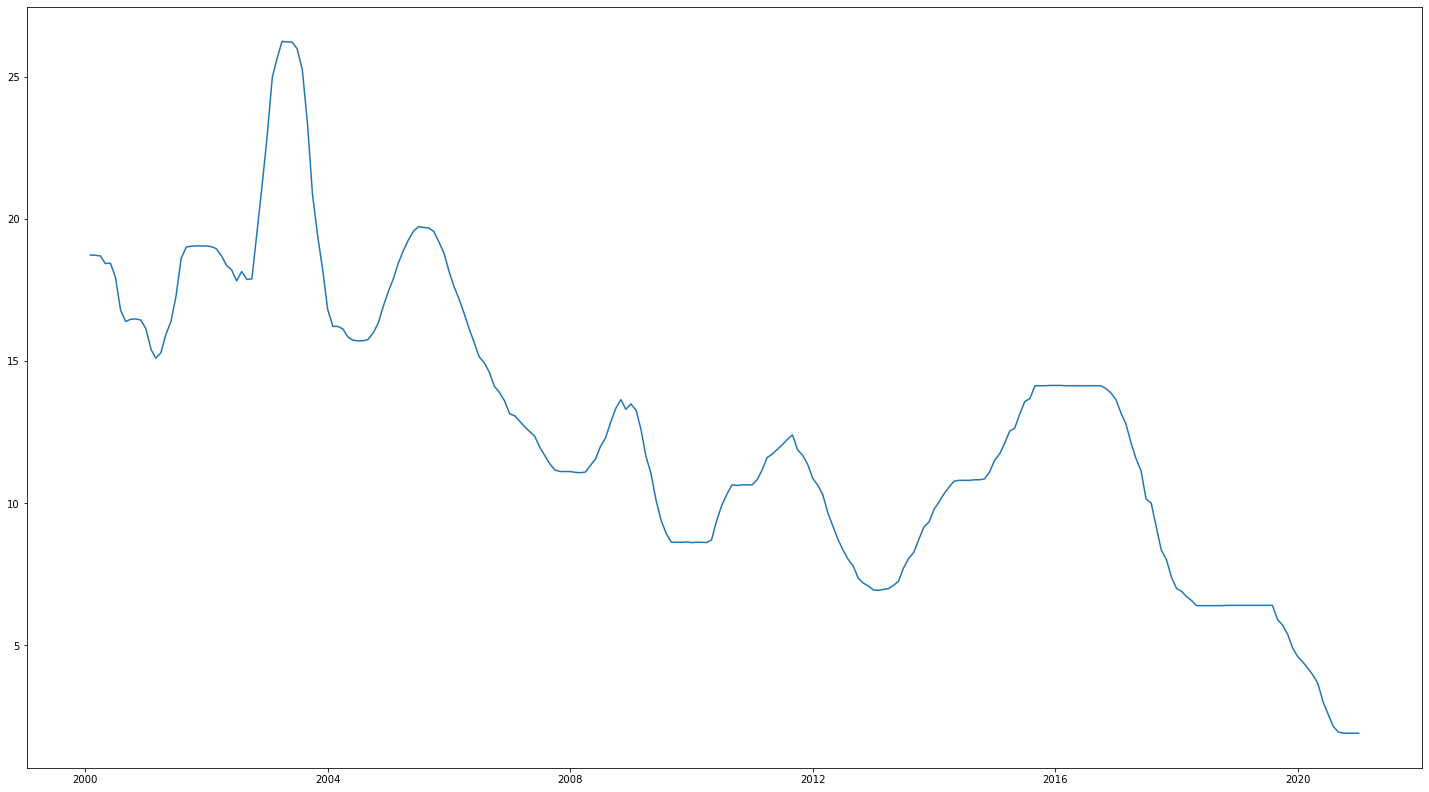

In [39]:
plt.figure(figsize = (25,14))
plt.plot(cdi);

In [40]:
cdi.rename(columns = {'Value': 'CDI'}, inplace = True)

In [41]:
cdi.head()

,CDI
Date,
2000-01-31,18.73
2000-02-29,18.72
2000-03-31,18.70
2000-04-30,18.43
2000-05-31,18.44


In [42]:
from functools import reduce

In [43]:
data_frames = [wti_crude, ipca, dolar, ourobrl, cdi, selic]

df_junto = reduce(lambda left, right: pd.merge(left, right, on =['Date'], how = 'inner'), data_frames,)

In [44]:
df_junto.head()

,Petroleo,IPCA,Dolar,Ouro,CDI,SELIC
Date,,,,,,
2010-03-31,83.45,5.17,1.7802,68.00,8.61,8.75
2010-04-30,86.07,5.26,1.7298,69.00,8.70,9.50
2010-06-30,75.59,4.84,1.8007,74.10,9.91,10.25
2010-08-31,71.93,4.49,1.7552,73.75,10.64,10.75
2010-09-30,79.95,4.70,1.6934,74.30,10.62,10.75


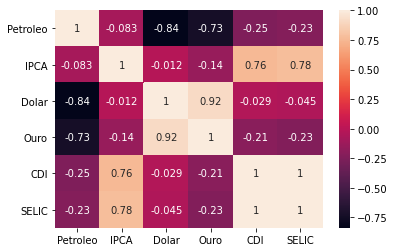

In [45]:
sns.heatmap(df_junto.corr(), annot = True);

# 2. Indicadores do mercado financeiro

In [46]:
ibov = data.DataReader('^BVSP', data_source = 'yahoo', start = '2010-01-01')

ibov.rename(columns = {'Adj Close': 'IBOV'}, inplace = True)

In [47]:
ibov = ibov.drop(ibov.columns[[0,1,2,3,4]], axis = 1)

In [48]:
ibov.head()

,IBOV
Date,
2010-01-04,70045.0
2010-01-05,70240.0
2010-01-06,70729.0
2010-01-07,70451.0
2010-01-08,70263.0


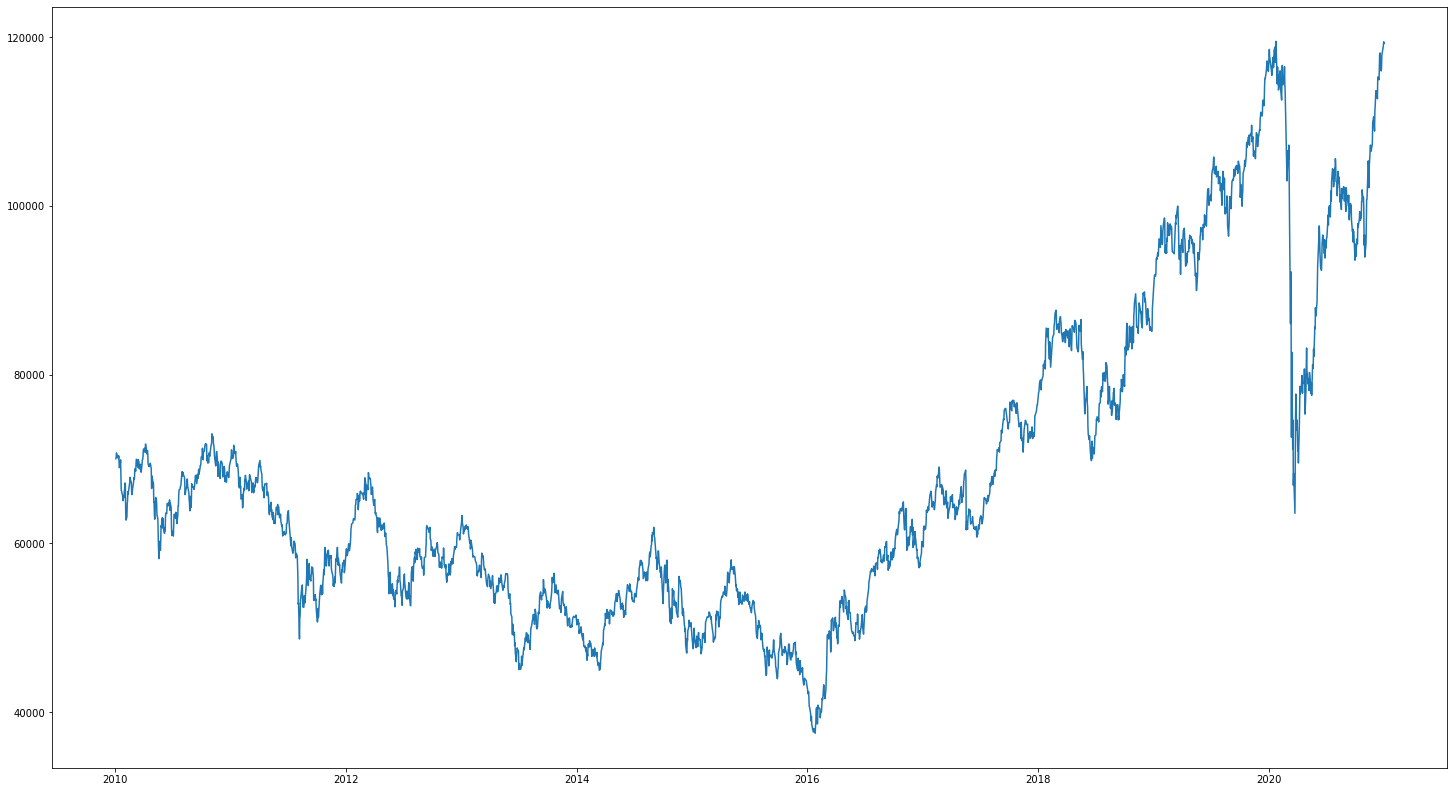

In [49]:
plt.figure(figsize=(25,14))
plt.plot(ibov);

In [50]:
sp500 = data.DataReader('^GSPC', data_source = 'yahoo', start = '2010-01-01')

sp500.rename(columns = {'Adj Close': "S&P"}, inplace = True)

sp500 = sp500.drop(sp500.columns[[0,1,2,3,4]], axis = 1)

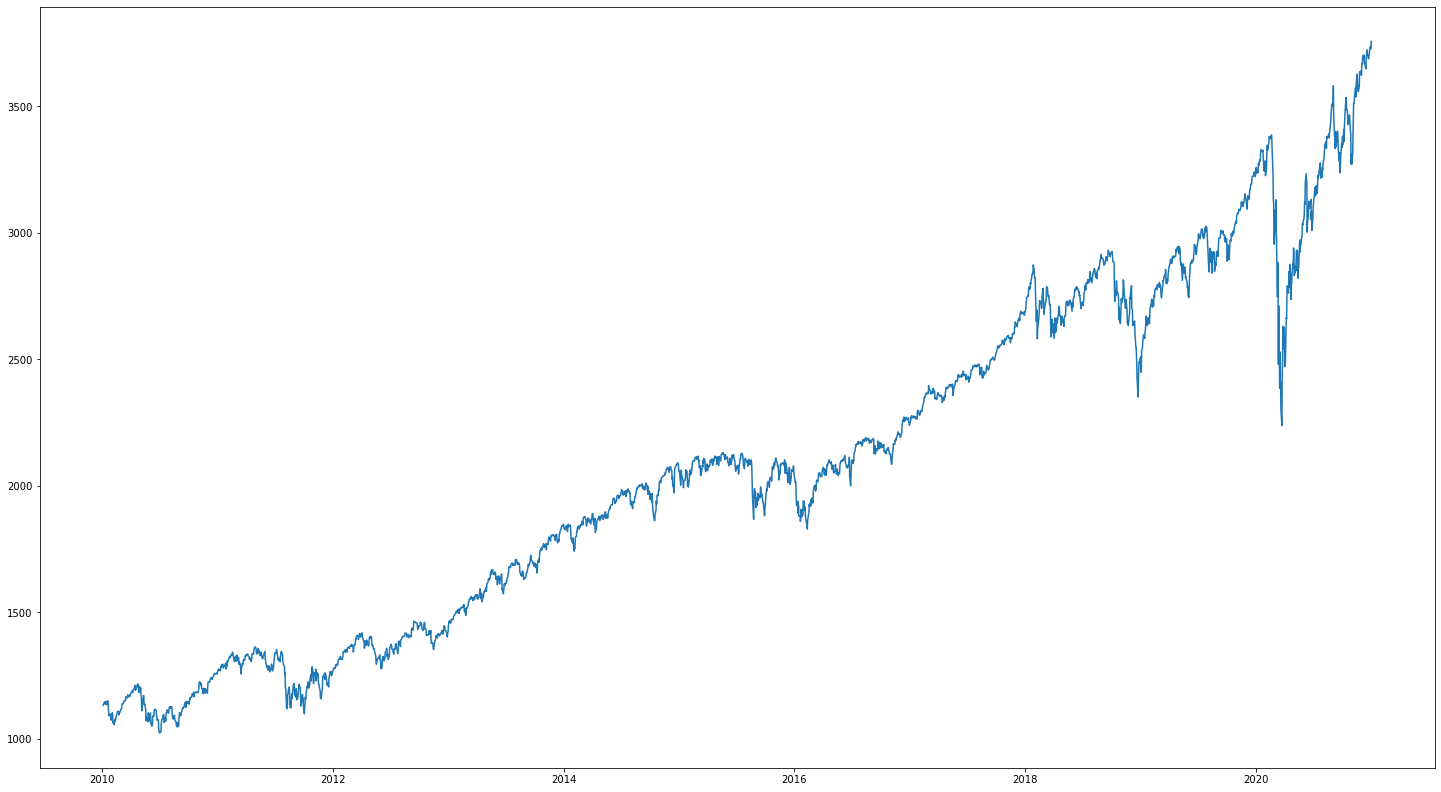

In [51]:
plt.figure(figsize=(25,14))

plt.plot(sp500);

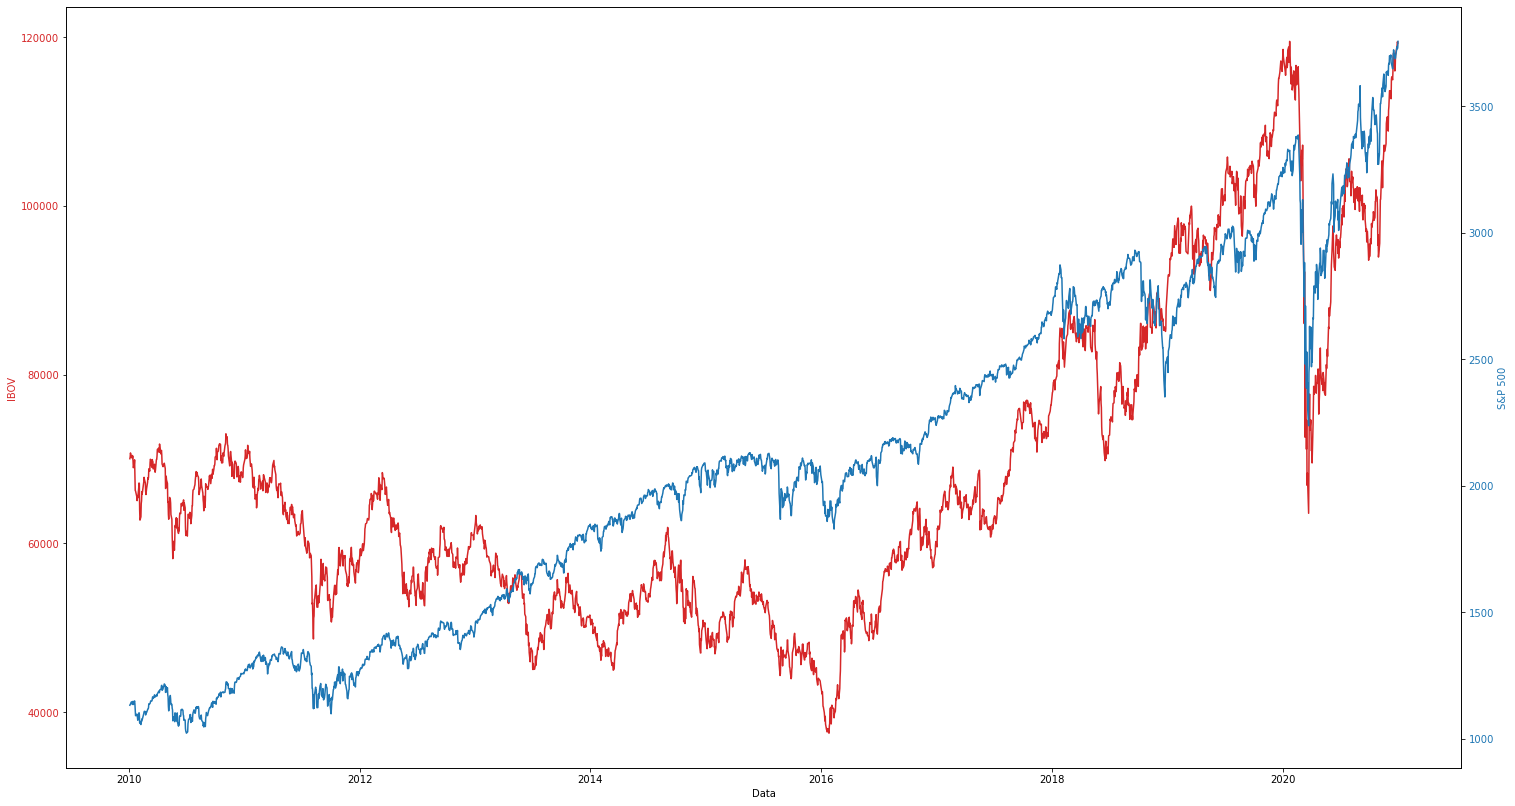

In [52]:
fig, ax1 = plt.subplots(figsize=(25,14))

color = 'tab:red'
ax1.set_xlabel('Data')
ax1.set_ylabel("IBOV", color=color)
ax1.plot(ibov, color =color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()    # Configurar um outro eixo vertical que compartilha o mesmo eixo X

color = 'tab:blue'
ax2.set_ylabel("S&P 500", color=color)
ax2.plot(sp500, color =color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

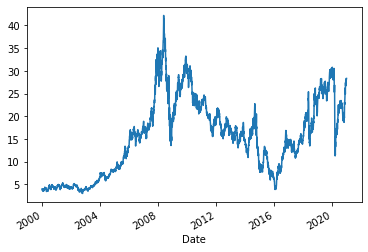

In [71]:
petr = data.DataReader('PETR4.SA', data_source = 'yahoo', start = '2000-01-01')
petr['Adj Close'].plot();